In [1]:
import requests
from bs4 import BeautifulSoup
import json
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
response = requests.get("https://www.moneycontrol.com/markets/technical-trends/?tab=uptrend&trend=turning-bullish&index=All%20NSE&indexId=-2&ex=N")
response.text

'<!DOCTYPE html><html lang="en"><head><link rel="preload" href="https://accounts.moneycontrol.com/assets/css/mclogin/bootstrap.min.css" as="style"/><link rel="preload" href="https://stat2.moneycontrol.com/mccss/headfoot/mc_header.css?v=1.11" as="style"/><meta charSet="utf-8"/><title>Markets Technical Trends: Check Stock &amp; Share Market Technical Trends | Moneycontrol</title><meta name="description" content="Markets Technical Trends: Discover stocks &amp; share markets latest technical trends by Moneycontrol. Get in-depth technical analysis of listed companies stocks and shares with deep data driven information and more. Tracking stocks which are turning bullish and turning bearish."/><meta name="Keywords" content="Markets technical trends, share market technical trends, stock market technical trends, technical trends, shares technical analysis, stocks technical analysis, market technical analysis, Turning Bullish Stocks, Turning Bearish Stocks, Bullish stocks, Bearish stocks, moment

In [3]:
 requests.JSONDecodeError

requests.exceptions.JSONDecodeError

In [4]:
soup = BeautifulSoup(response.text, "html.parser")
soup.prettify()
a = soup.find(id="__NEXT_DATA__").contents
a[0]

'{"props":{"pageProps":{"deviceTypeProp":"web","isApp":false,"appSource":"web","darkMode":false,"technicalTrendsData":{"selectedTab":"uptrend","type":"turning-bullish","list":[{"scId":"PR","StockName":"Patel Integrate","type":"Stock","currTrend":"Very Bullish","currPrice":"24.49","prevTrend":"Bearish","performance":"0.86","trendChngDate":"07 Nov, 2024","trendChngPrice":"24.28","updatedTime":"Nov 08 | 15:58","url":"https://www.moneycontrol.com/india/stockpricequote/courier-services/patelintegratedlogistics/PIL05","analysisUrl":"patelintegratedlogistics/PIL05"},{"scId":"RAS","StockName":"Sarda Energy","type":"Stock","currTrend":"Bullish","currPrice":"462.40","prevTrend":"Bearish","performance":"-1.37","trendChngDate":"07 Nov, 2024","trendChngPrice":"468.80","updatedTime":"Nov 08 | 15:59","url":"https://www.moneycontrol.com/india/stockpricequote/steel-sponge-iron/sardaenergyminerals/SEM","analysisUrl":"sardaenergyminerals/SEM"},{"scId":"KP06","StockName":"Kothari Product","type":"Stock","

In [5]:
hdata = json.loads(a[0])
hdata

{'props': {'pageProps': {'deviceTypeProp': 'web',
   'isApp': False,
   'appSource': 'web',
   'darkMode': False,
   'technicalTrendsData': {'selectedTab': 'uptrend',
    'type': 'turning-bullish',
    'list': [{'scId': 'PR',
      'StockName': 'Patel Integrate',
      'type': 'Stock',
      'currTrend': 'Very Bullish',
      'currPrice': '24.49',
      'prevTrend': 'Bearish',
      'performance': '0.86',
      'trendChngDate': '07 Nov, 2024',
      'trendChngPrice': '24.28',
      'updatedTime': 'Nov 08 | 15:58',
      'url': 'https://www.moneycontrol.com/india/stockpricequote/courier-services/patelintegratedlogistics/PIL05',
      'analysisUrl': 'patelintegratedlogistics/PIL05'},
     {'scId': 'RAS',
      'StockName': 'Sarda Energy',
      'type': 'Stock',
      'currTrend': 'Bullish',
      'currPrice': '462.40',
      'prevTrend': 'Bearish',
      'performance': '-1.37',
      'trendChngDate': '07 Nov, 2024',
      'trendChngPrice': '468.80',
      'updatedTime': 'Nov 08 | 15:59',

In [6]:
data = pd.DataFrame(hdata["props"]['pageProps']['technicalTrendsData']['list'])
data

,scId,StockName,type,currTrend,currPrice,prevTrend,performance,trendChngDate,trendChngPrice,updatedTime,url,analysisUrl
0,PR,Patel Integrate,Stock,Very Bullish,24.49,Bearish,0.86,"07 Nov, 2024",24.28,Nov 08 | 15:58,https://www.moneycontrol.com/india/stockpriceq...,patelintegratedlogistics/PIL05
1,RAS,Sarda Energy,Stock,Bullish,462.40,Bearish,-1.37,"07 Nov, 2024",468.80,Nov 08 | 15:59,https://www.moneycontrol.com/india/stockpriceq...,sardaenergyminerals/SEM
2,KP06,Kothari Product,Stock,Bullish,154.12,Bearish,-1.14,"07 Nov, 2024",155.90,Nov 08 | 15:46,https://www.moneycontrol.com/india/stockpriceq...,kothariproducts/KP06
3,HPI02,Hariom Pipe,Stock,Bullish,631.85,Bearish,-1.34,"07 Nov, 2024",640.45,Nov 08 | 15:58,https://www.moneycontrol.com/india/stockpriceq...,hariompipeindustries/HPI02
4,JCA,Jyoti CNC Auto,Stock,Very Bullish,"1,130.50",Bearish,-1.77,"07 Nov, 2024","1,150.90",Nov 08 | 15:59,https://www.moneycontrol.com/india/stockpriceq...,jyoticncautomation/JCA
5,NKI,NK Industries,Stock,Bullish,50.87,Very Bearish,1.78,"07 Nov, 2024",49.98,Nov 08 | 15:32,https://www.moneycontrol.com/india/stockpriceq...,nkindustries/NKI
6,MC07,Mazda,Stock,Bullish,"1,366.25",Bearish,3.97,"07 Nov, 2024","1,314.05",Nov 08 | 15:52,https://www.moneycontrol.com/india/stockpriceq...,mazda/M14
7,MHS01,Medplus Health,Stock,Very Bullish,680.00,Very Bearish,-0.03,"07 Nov, 2024",680.20,Nov 08 | 15:52,https://www.moneycontrol.com/india/stockpriceq...,medplushealthservices/MHS01
8,NCI02,Nagreeka Cap,Stock,Very Bullish,28.51,Bearish,4.97,"07 Nov, 2024",27.16,Nov 08 | 15:51,https://www.moneycontrol.com/india/stockpriceq...,nagreekacapitalinfrastructure/NCI
9,JE02,JSW Energy,Stock,Bullish,712.05,Very Bearish,-0.38,"07 Nov, 2024",714.80,Nov 08 | 15:59,https://www.moneycontrol.com/india/stockpriceq...,jswenergy/JE01


In [7]:
data.shape

(20, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   scId            20 non-null     object
 1   StockName       20 non-null     object
 2   type            20 non-null     object
 3   currTrend       20 non-null     object
 4   currPrice       20 non-null     object
 5   prevTrend       20 non-null     object
 6   performance     20 non-null     object
 7   trendChngDate   20 non-null     object
 8   trendChngPrice  20 non-null     object
 9   updatedTime     20 non-null     object
 10  url             20 non-null     object
 11  analysisUrl     20 non-null     object
dtypes: object(12)
memory usage: 2.0+ KB


In [9]:
data.drop(columns=["scId", "updatedTime", "url", "analysisUrl"], inplace=True)

In [10]:
data

,StockName,type,currTrend,currPrice,prevTrend,performance,trendChngDate,trendChngPrice
0,Patel Integrate,Stock,Very Bullish,24.49,Bearish,0.86,"07 Nov, 2024",24.28
1,Sarda Energy,Stock,Bullish,462.40,Bearish,-1.37,"07 Nov, 2024",468.80
2,Kothari Product,Stock,Bullish,154.12,Bearish,-1.14,"07 Nov, 2024",155.90
3,Hariom Pipe,Stock,Bullish,631.85,Bearish,-1.34,"07 Nov, 2024",640.45
4,Jyoti CNC Auto,Stock,Very Bullish,"1,130.50",Bearish,-1.77,"07 Nov, 2024","1,150.90"
5,NK Industries,Stock,Bullish,50.87,Very Bearish,1.78,"07 Nov, 2024",49.98
6,Mazda,Stock,Bullish,"1,366.25",Bearish,3.97,"07 Nov, 2024","1,314.05"
7,Medplus Health,Stock,Very Bullish,680.00,Very Bearish,-0.03,"07 Nov, 2024",680.20
8,Nagreeka Cap,Stock,Very Bullish,28.51,Bearish,4.97,"07 Nov, 2024",27.16
9,JSW Energy,Stock,Bullish,712.05,Very Bearish,-0.38,"07 Nov, 2024",714.80


In [11]:
data["performance"] = data["performance"].apply(float)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StockName       20 non-null     object 
 1   type            20 non-null     object 
 2   currTrend       20 non-null     object 
 3   currPrice       20 non-null     object 
 4   prevTrend       20 non-null     object 
 5   performance     20 non-null     float64
 6   trendChngDate   20 non-null     object 
 7   trendChngPrice  20 non-null     object 
dtypes: float64(1), object(7)
memory usage: 1.4+ KB


# 1. Plot Performance by Stock Name
This bar plot shows each stock's performance to identify those with positive or negative metrics.

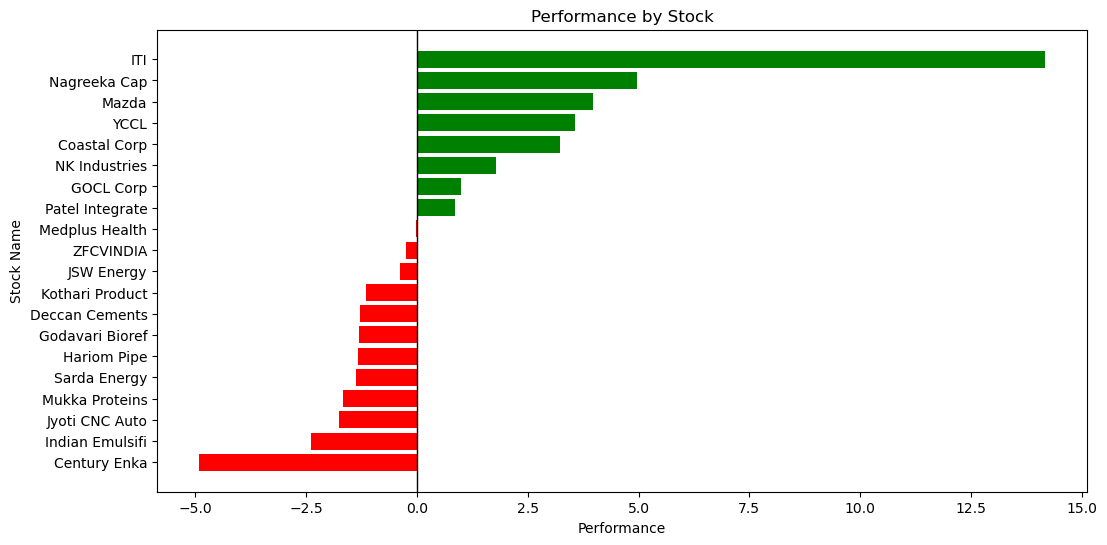

In [13]:
# Sort data by performance
data_sorted = data.sort_values(by="performance", ascending=True)

# Separate negative and positive performance data
neg_data = data_sorted[data_sorted['performance'] < 0]
pos_data = data_sorted[data_sorted['performance'] >= 0]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot negative bars
ax.barh(neg_data['StockName'], neg_data['performance'], color='red')

# Plot positive bars
ax.barh(pos_data['StockName'], pos_data['performance'], color='green')

# Set title and labels
ax.set_title('Performance by Stock')
ax.set_xlabel('Performance')
ax.set_ylabel('Stock Name')

# Show zero line
ax.axvline(0, color='black', linewidth=1)

# Show plot
plt.show()

# 2. Compare Current vs Previous Trend
This count plot compares the currTrend and prevTrend to understand how stock trends have shifted.

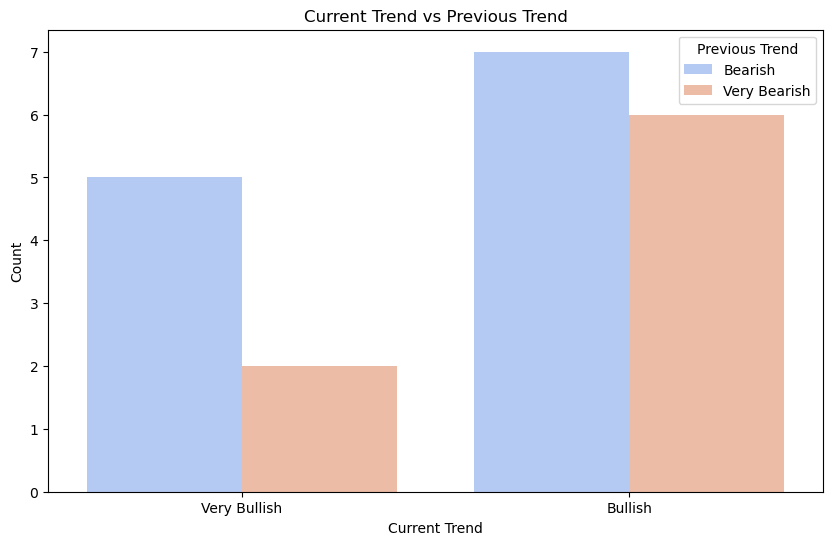

In [14]:
# Plot: Comparison of Current Trend vs Previous Trend
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='currTrend', hue='prevTrend', palette="coolwarm")
plt.title("Current Trend vs Previous Trend")
plt.xlabel("Current Trend")
plt.ylabel("Count")
plt.legend(title="Previous Trend")
plt.show()